# Basit Dogrusal Regresyon

In [1]:
import pandas as pd
ad = pd.read_csv('Data/Advertising.csv')
df = ad.copy()
df.head()

Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

In [2]:
df = df.iloc[:,1:]
df.head()

TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.describe().T

count      mean        std  min     25%     50%      75%    max
TV         200.0  147.0425  85.854236  0.7  74.375  149.75  218.825  296.4
radio      200.0   23.2640  14.846809  0.0   9.975   22.90   36.525   49.6
newspaper  200.0   30.5540  21.778621  0.3  12.750   25.75   45.100  114.0
sales      200.0   14.0225   5.217457  1.6  10.375   12.90   17.400   27.0

In [5]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [6]:
df.corr()

TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000

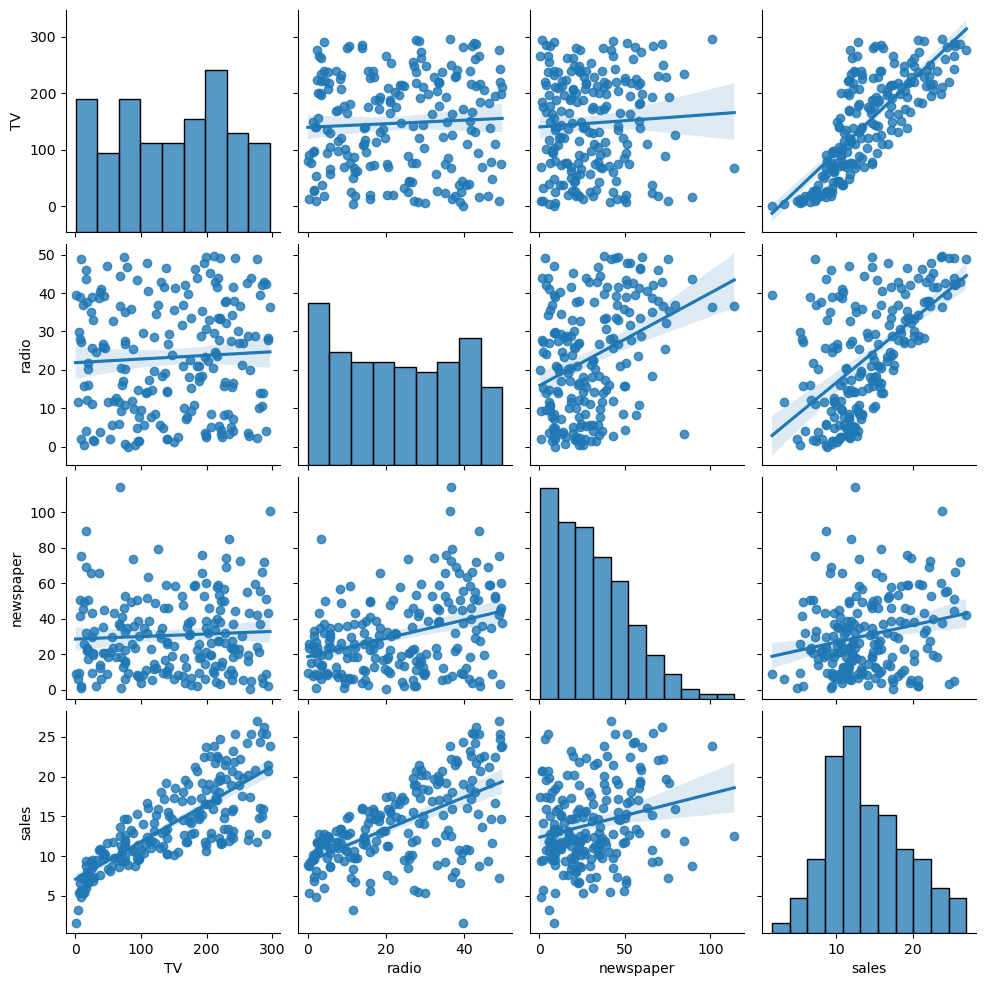

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.pairplot(df, kind = 'reg')
plt.show()

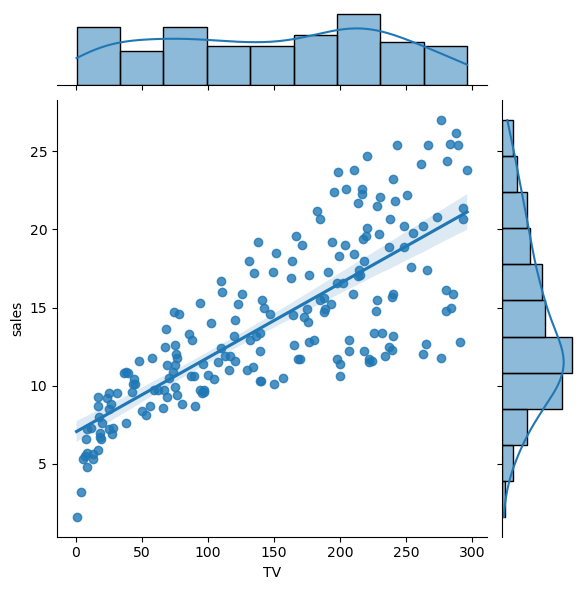

In [8]:
sns.jointplot(x = 'TV', y='sales', data = df, kind = 'reg')

## Statsmodels ile modelleme

In [9]:
import statsmodels.api as sm

In [10]:
X = df[['TV']]

In [11]:
X = sm.add_constant(X)

In [12]:
X[0:5]

const     TV
0    1.0  230.1
1    1.0   44.5
2    1.0   17.2
3    1.0  151.5
4    1.0  180.8

In [13]:
y = df['sales']

In [14]:
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [15]:
lm = sm.OLS(y, X)

In [16]:
model = lm.fit()

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           1.47e-42
Time:                        17:19:54   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
import statsmodels.formula.api as smf
lm = smf.ols('sales ~ TV', df)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           1.47e-42
Time:                        17:19:54   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [20]:
model.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

In [21]:
model.conf_int()

0         1
Intercept  6.129719  7.935468
TV         0.042231  0.052843

In [22]:
model.f_pvalue

1.467389700194647e-42

In [23]:
model.mse_model

3314.618166868649

In [24]:
model.rsquared_adj

0.6099148238341623

In [25]:
model.fittedvalues[0:5]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [26]:
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [27]:
## Sklearn

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
X = df[['TV']]
y = df['sales']
reg = LinearRegression()
model = reg.fit(X,y)

In [30]:
model.score(X,y) # R^2 degeri

0.611875050850071

In [31]:
model.predict(X)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

## Tahmin
model denklemi:

Sales = 7.03 + TV*0.04

ornegin 30 birim TV harcamasi oldugunda satislarin tahmini degeri ne olur ?

In [32]:
7.03 + 30*0.04

8.23

In [33]:
X = df[['TV']]
y = df['sales']
reg = LinearRegression()
model = reg.fit(X,y)

In [34]:
model.predict([[30]])

/Users/huseyinefkanalp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8.45869276])

In [35]:
yeni_veri = [[5],[90],[200]]

In [36]:
model.predict(yeni_veri)

/Users/huseyinefkanalp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 7.27027675, 11.31089119, 16.53992164])

## Artiklar ve Makine Ogrenmsesindeki Onemi

In [37]:
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
lm = smf.ols('sales ~ TV', df)
model = lm.fit()

In [39]:
mse = mean_squared_error(y, model.fittedvalues)

In [40]:
mse # Birim basina ortalama hata

10.512652915656757

In [41]:
import numpy as np
rmse = np.sqrt(mse)

In [42]:
rmse

3.2423221486546887

In [43]:
reg.predict(X)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [44]:
y[0:10]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [45]:
k_t = pd.DataFrame({'gercek_y': y[0:10],
                   'tahmin_y': reg.predict(X)[0:10]})

In [46]:
k_t

gercek_y   tahmin_y
0      22.1  17.970775
1      10.4   9.147974
2       9.3   7.850224
3      18.5  14.234395
4      12.9  15.627218
5       7.2   7.446162
6      11.8   9.765950
7      13.2  12.746498
8       4.8   7.441409
9      10.6  16.530414

In [47]:
k_t ['hata'] = k_t['gercek_y'] - k_t['tahmin_y']

In [48]:
k_t

gercek_y   tahmin_y      hata
0      22.1  17.970775  4.129225
1      10.4   9.147974  1.252026
2       9.3   7.850224  1.449776
3      18.5  14.234395  4.265605
4      12.9  15.627218 -2.727218
5       7.2   7.446162 -0.246162
6      11.8   9.765950  2.034050
7      13.2  12.746498  0.453502
8       4.8   7.441409 -2.641409
9      10.6  16.530414 -5.930414

In [49]:
k_t['hata_kare'] = k_t['hata']**2

In [50]:
k_t

gercek_y   tahmin_y      hata  hata_kare
0      22.1  17.970775  4.129225  17.050503
1      10.4   9.147974  1.252026   1.567569
2       9.3   7.850224  1.449776   2.101851
3      18.5  14.234395  4.265605  18.195390
4      12.9  15.627218 -2.727218   7.437719
5       7.2   7.446162 -0.246162   0.060596
6      11.8   9.765950  2.034050   4.137358
7      13.2  12.746498  0.453502   0.205664
8       4.8   7.441409 -2.641409   6.977040
9      10.6  16.530414 -5.930414  35.169814

In [51]:
np.sum(k_t['hata_kare'])

92.90350329638102

In [52]:
np.mean(k_t['hata_kare'])

9.290350329638102

In [53]:
np.sqrt(np.mean(k_t['hata_kare']))

3.048007599996775

## Coklu Dogrusal Regresyon

Temel amac, bagimli ve bagimsiz degiskenler arasindaki iliskiyi ifade eden dogrusal fonksiyonu bulmaktir

In [54]:
df = ad.copy()
df

Unnamed: 0     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]

In [55]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [56]:
df.head()

TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [57]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [58]:
X = df.drop('sales', axis = 1)
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)


In [59]:
X_train.shape

(160, 3)

In [60]:
y_train.shape

(160,)

In [61]:
X_test.shape

(40, 3)

In [62]:
y_test.shape

(40,)

In [63]:
training = df.copy()

In [64]:
## Statsmodels

In [65]:
lm = sm.OLS(y_train, X_train)

In [66]:
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2935.
Date:                Fri, 15 Dec 2023   Prob (F-statistic):                   1.28e-137
Time:                        17:19:54   Log-Likelihood:                         -336.65
No. Observations:                 160   AIC:                                      679.3
Df Residuals:                     157   BIC:                                      688.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0531      0.001     36.467      0.000       0.050       0.056
radio          0.2188      0.011     20.138      0.000       0.197       0.240
newspaper      0.0239      0.008      3.011      0.003       0.008       0.040
==============================================================================
Omnibus:                       11.405   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.574
Skew:                          -0.432   Prob(JB):                     0.000415
Kurtosis:                       4.261   Cond. No.                         13.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
## Scikit-learn

In [68]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [69]:
model.intercept_

2.979067338122629

In [70]:
model.coef_

array([0.04472952, 0.18919505, 0.00276111])

## Tahmin

sales = 2.97 + + TV00.4 + radio0.18 + newspaper0.002

Ornegin 30 birim Tv harcamasi, 10 birim radio harcamasi, 40 birim gazete harcamasi oldugunda satislarin tahmini degeri ne olur?

In [71]:
yeni_veri = [[30], [10], [40]]
yeni_veri = pd.DataFrame(yeni_veri).T
yeni_veri

0   1   2
0  30  10  40

In [72]:
model.predict(yeni_veri)

/Users/huseyinefkanalp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6.32334798])

In [73]:
# Egitim hatasi
rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

In [74]:
rmse

1.6447277656443373

In [75]:
# Test hatasi
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

In [76]:
rmse

1.7815996615334506

## Model Tuning / Model Dogrulama

In [77]:
cross_val_score(model, X_train, y_train, cv=10, scoring = 'r2').mean()

0.791354859691634

In [78]:
np.sqrt(-cross_val_score(model, X_train, y_train, cv=10, scoring = 'neg_mean_squared_error')).mean()

1.6513523730313335

In [79]:
np.sqrt(-cross_val_score(model, X_test, y_test, cv=10, scoring = 'neg_mean_squared_error')).mean()

1.846277882399709

## PCR (Temel Bilesenler Regresyonu)

Degiskenlere boyut indirgeme uygulandiktan sonra cikan bilesenlere regresyon modeli kurulmasi fikrine dayanir.

In [82]:
hit = pd.read_csv('Data/Hitters.csv')
df = hit.copy()
df = df.dropna()
df.head()

AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    321    87     10    39   42     30      2     396    101      12     48   
5    594   169      4    74   51     35     11    4408   1133      19    501   

   CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary NewLeague  
1   414     375      N        W      632       43      10   475.0         N  
2   266     263      A        W      880       82      14   480.0         A  
3   838     354      N        E      200       11       3   500.0         N  
4    46      33      N        E      805       40       4    91.5         N  
5   336     194      A        W      282      421      25   750.0         A

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

In [84]:
df.describe().T

count         mean          std   min    25%     50%     75%      max
AtBat    263.0   403.642586   147.307209  19.0  282.5   413.0   526.0    687.0
Hits     263.0   107.828897    45.125326   1.0   71.5   103.0   141.5    238.0
HmRun    263.0    11.619772     8.757108   0.0    5.0     9.0    18.0     40.0
Runs     263.0    54.745247    25.539816   0.0   33.5    52.0    73.0    130.0
RBI      263.0    51.486692    25.882714   0.0   30.0    47.0    71.0    121.0
Walks    263.0    41.114068    21.718056   0.0   23.0    37.0    57.0    105.0
Years    263.0     7.311787     4.793616   1.0    4.0     6.0    10.0     24.0
CAtBat   263.0  2657.543726  2286.582929  19.0  842.5  1931.0  3890.5  14053.0
CHits    263.0   722.186312   648.199644   4.0  212.0   516.0  1054.0   4256.0
CHmRun   263.0    69.239544    82.197581   0.0   15.0    40.0    92.5    548.0
CRuns    263.0   361.220532   331.198571   2.0  105.5   250.0   497.5   2165.0
CRBI     263.0   330.418251   323.367668   3.0   95.0   230.0   424.5   1659.0
CWalks   263.0   260.266160   264.055868   1.0   71.0   174.0   328.5   1566.0
PutOuts  263.0   290.711027   279.934575   0.0  113.5   224.0   322.5   1377.0
Assists  263.0   118.760456   145.080577   0.0    8.0    45.0   192.0    492.0
Errors   263.0     8.593156     6.606574   0.0    3.0     7.0    13.0     32.0
Salary   263.0   535.925882   451.118681  67.5  190.0   425.0   750.0   2460.0

In [85]:
#Kategorik degiskenlere one-hot encoding
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
dms.head()

League_A  League_N  Division_E  Division_W  NewLeague_A  NewLeague_N
1         0         1           0           1            0            1
2         1         0           0           1            1            0
3         0         1           1           0            0            1
4         0         1           1           0            0            1
5         1         0           0           1            1            0

In [86]:
y = df['Salary']

In [87]:
# Bagimli degisken ve kategorik degiskenlerin ilk halini cikarttik
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

In [89]:
# Dummy degisken dataframe ile birlestirerek bagimsiz degiskenlerimizi olusturmus olacagiz
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X.head()

AtBat   Hits  HmRun  Runs   RBI  Walks  Years  CAtBat   CHits  CHmRun  \
1  315.0   81.0    7.0  24.0  38.0   39.0   14.0  3449.0   835.0    69.0   
2  479.0  130.0   18.0  66.0  72.0   76.0    3.0  1624.0   457.0    63.0   
3  496.0  141.0   20.0  65.0  78.0   37.0   11.0  5628.0  1575.0   225.0   
4  321.0   87.0   10.0  39.0  42.0   30.0    2.0   396.0   101.0    12.0   
5  594.0  169.0    4.0  74.0  51.0   35.0   11.0  4408.0  1133.0    19.0   

   CRuns   CRBI  CWalks  PutOuts  Assists  Errors  League_N  Division_W  \
1  321.0  414.0   375.0    632.0     43.0    10.0         1           1   
2  224.0  266.0   263.0    880.0     82.0    14.0         0           1   
3  828.0  838.0   354.0    200.0     11.0     3.0         1           0   
4   48.0   46.0    33.0    805.0     40.0     4.0         1           0   
5  501.0  336.0   194.0    282.0    421.0    25.0         0           1   

   NewLeague_N  
1            1  
2            0  
3            1  
4            1  
5            0

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state=42)

print('X_train :' ,X_train.shape)
print('X_test :' ,X_test.shape)
print('y_train :' ,y_train.shape)
print('y_test :' ,y_test.shape)

training = df.copy()
print('training :', training.shape)

X_train : (197, 19)
X_test : (66, 19)
y_train : (197,)
y_test : (66,)
training : (263, 20)


In [96]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca = PCA()

In [97]:
X_reduced_train = pca.fit_transform(scale(X_train)) 

In [98]:
X_reduced_train[0:1,:]

array([[-2.49569913e+00, -3.37762397e-01,  7.06391950e-01,
        -1.32791025e+00, -8.21824333e-01, -6.62790677e-01,
        -6.56764789e-01,  3.68093279e-02, -2.03665105e-01,
         1.76134815e-01, -9.20131987e-02,  2.40129020e-01,
        -3.60473661e-03, -3.41246327e-02,  4.32799605e-02,
         1.02996923e-01,  3.70733348e-03,  1.37933445e-03,
        -6.63814471e-03]])

In [100]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)[0:10]

array([38.18, 59.88, 70.88, 78.88, 84.18, 88.45, 92.05, 94.86, 96.34,
       97.28])

In [102]:
lm = LinearRegression()

In [103]:
pcr_model = lm.fit(X_reduced_train, y_train)

In [104]:
pcr_model.intercept_

543.4834416243655

In [105]:
pcr_model.coef_

array([ 111.13977427,  -29.34209502,   26.29799759,  -38.47549852,
        -56.9200785 ,   54.44779423,   40.77493384,  -23.72746012,
          9.31198164,   13.02031672,   45.58357748,   31.97791627,
         18.93930958, -115.60940171,   24.00382778,  415.70806202,
       -449.51779543,  563.07375399,  302.53718462])

### Tahmin

In [106]:
y_pred = pcr_model.predict(X_reduced_train)

In [107]:
y_pred[0:5]

array([377.44484744, 802.19452124, 495.60987745, 112.53177731,
       426.21613066])

In [108]:
np.sqrt(mean_squared_error(y_train, y_pred))

289.32928255649756

In [109]:
df['Salary'].mean()

535.9258821292775

In [110]:
r2_score(y_train, y_pred)

0.577007525041018

In [111]:
pca2= PCA()

In [112]:
X_reduced_test = pca2.fit_transform(scale(X_test))

In [113]:
y_pred = pcr_model.predict(X_reduced_test)

In [114]:
np.sqrt(mean_squared_error(y_test, y_pred))

405.1575364149966

### Model Tuning

In [119]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:10], y_train)
y_pred = pcr_model.predict(X_reduced_test[:,0:10])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

390.7914255682223


In [120]:
from sklearn import model_selection

In [122]:
cv_10 = model_selection.KFold(n_splits=10,
                             shuffle = True,
                             random_state = 1)

In [123]:
lm = LinearRegression()

In [124]:
RMSE=[]

In [125]:
for i in np.arange(1, X_reduced_train.shape[1]+1):
    
    score = np.sqrt(-1*model_selection.cross_val_score(lm,
                                                       X_reduced_train[:,:i],
                                                       y_train.ravel(),
                                                       cv=cv_10,
                                                       scoring = 'neg_mean_squared_error').mean())
    RMSE.append(score)

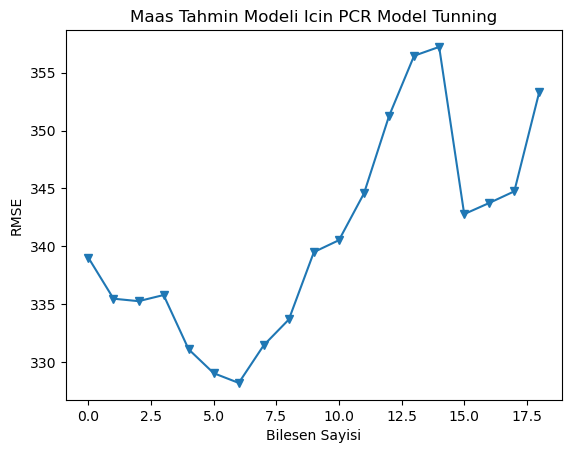

In [129]:
plt.plot(RMSE, '-v')
plt.xlabel('Bilesen Sayisi')
plt.ylabel('RMSE')
plt.title('Maas Tahmin Modeli Icin PCR Model Tunning');

In [130]:
lm = LinearRegression()

In [131]:
pcr_model = lm.fit(X_reduced_train[:,0:6], y_train)

In [132]:
y_pred = pcr_model.predict(X_reduced_train[:,0:6])

In [134]:
print(np.sqrt(mean_squared_error(y_train, y_pred)))

308.82659830945005


In [137]:
y_pred = pcr_model.predict(X_reduced_test[:,0:6])

In [138]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

393.1198700096223


## PLS (Kismi En Kucuk Kareler Regresyonu)

Degiskenlerin daha az sayida ve aralarinda coklu dogrusal baglanti problemi olmayan bilesenlere indirgenip regresyon modeli kurulmasi fikrine dayanir.

In [140]:
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df['Salary']
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [142]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD

In [143]:
pls_model = PLSRegression().fit(X_train, y_train)

In [144]:
pls_model.coef_

array([[ 35.32916493],
       [ 48.83425857],
       [ 18.50240933],
       [ 39.28117603],
       [ 30.59952998],
       [ 40.03398345],
       [ 16.85990516],
       [ 28.22289896],
       [ 32.73784993],
       [ 22.00875744],
       [ 33.60903032],
       [ 30.39402522],
       [ 25.73279799],
       [ 54.98835148],
       [  6.56590871],
       [ -0.90894359],
       [ 17.60903423],
       [-37.24246339],
       [ 14.69680385]])

### Tahmin

In [147]:
X_train.head()

AtBat   Hits  HmRun  Runs   RBI  Walks  Years  CAtBat   CHits  CHmRun  \
183  328.0   91.0   12.0  51.0  43.0   33.0    2.0   342.0    94.0    12.0   
229  514.0  144.0    0.0  67.0  54.0   79.0    9.0  4739.0  1169.0    13.0   
286  593.0  152.0   23.0  69.0  75.0   53.0    6.0  2765.0   686.0   133.0   
102  233.0   49.0    2.0  41.0  23.0   18.0    8.0  1350.0   336.0     7.0   
153  341.0   95.0    6.0  48.0  42.0   20.0   10.0  2964.0   808.0    81.0   

     CRuns   CRBI  CWalks  PutOuts  Assists  Errors  League_N  Division_W  \
183   51.0   44.0    33.0    145.0     59.0     8.0         1           0   
229  583.0  374.0   528.0    229.0    453.0    15.0         1           0   
286  369.0  384.0   321.0    315.0     10.0     6.0         0           1   
102  166.0  122.0   106.0    102.0    132.0    10.0         0           0   
153  379.0  428.0   221.0    158.0      4.0     5.0         1           1   

     NewLeague_N  
183            1  
229            1  
286            0  
102            0  
153            1

In [148]:
pls_model.predict(X_train)[0:10]

array([[344.91941493],
       [848.87070769],
       [692.93622642],
       [185.56577984],
       [435.49196077],
       [987.49530026],
       [120.63097106],
       [289.9263406 ],
       [663.41886918],
       [817.90486641]])

In [149]:
y_pred = pls_model.predict(X_train)

In [150]:
print(np.sqrt(mean_squared_error(y_train, y_pred)))

310.1167593109696


In [151]:
r2_score(y_train, y_pred)

0.5140424486535481